# Data Preprocessing

In [563]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [564]:
# Read Dataset and show the first five rows
data = pd.read_csv('3A.tsv', sep='\t')
data.head()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,-706.0,NaN,NaN
2,2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,-92.0,NaN,NaN


In [565]:
# Delete identifier
data.drop(columns=["index"], inplace=True)

In [566]:
# Show data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16928 entries, 0 to 16927
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16926 non-null  object 
 1   Platform         16928 non-null  object 
 2   Year_of_Release  16928 non-null  int64  
 3   Genre            16926 non-null  object 
 4   Publisher        16873 non-null  object 
 5   NA_Sales         16928 non-null  float64
 6   EU_Sales         16928 non-null  float64
 7   JP_Sales         16928 non-null  float64
 8   Other_Sales      16928 non-null  float64
 9   Global_Sales     16928 non-null  float64
 10  Critic_Score     8260 non-null   float64
 11  Critic_Count     8260 non-null   float64
 12  User_Score       10159 non-null  object 
 13  User_Count       16928 non-null  float64
 14  Developer        10240 non-null  object 
 15  Rating           10092 non-null  object 
dtypes: float64(8), int64(1), object(7)
memory usage: 2.1+ MB


The dataset consists of 16 columns and 16,928 entries, with some missing values in key columns such as Name, Genre, Publisher, Critic_Score, Critic_Count, User_Score, Developer, and Rating. The dataset primarily focuses on video games, with numerical data on sales (NA_Sales, EU_Sales, JP_Sales, Other_Sales, and Global_Sales), critic and user reviews (Critic_Score, Critic_Count, User_Score, User_Count), and additional categorical attributes like Platform, Genre, Publisher, and Rating. While most columns are complete, the review-related fields contain significant missing data, which may require imputation or exclusion during analysis. Overall, the dataset is diverse and offers insights into regional sales performance, platform preferences, and the impact of reviews on global sales

In [567]:
# Data Description
data.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16928.000000,16928.000000,16928.000000,16928.000000,16928.000000,16928.000000,8260.000000,8260.000000,16928.000000
mean,1974.215147,0.266390,0.146850,0.078170,0.047861,0.539520,69.037893,26.428692,-195.792120
std,252.128480,0.814326,0.504585,0.308756,0.186675,1.550545,13.943198,18.989929,545.393536
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,-1000.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,-538.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,-82.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.490000,79.000000,36.000000,21.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [568]:
# Show dataset columns
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

## Handling Missing Value

In [569]:
# Show the total missing value
data.isna().sum()

Name                  2
Platform              0
Year_of_Release       0
Genre                 2
Publisher            55
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8668
Critic_Count       8668
User_Score         6769
User_Count            0
Developer          6688
Rating             6836
dtype: int64

In [570]:
# Drop columns with more than 50% missing values, as they are not significant
data.drop(columns=['Critic_Score', 'Critic_Count', 'User_Score'], inplace=True)

In [571]:
# Impute Missing Values in Categorical Columns Using the Value 'Unknown'
data['Developer'].fillna('Unknown', inplace=True)
data['Rating'].fillna('Unknown', inplace=True)

In [572]:
# Delete NA Rows
data = data.dropna()

In [573]:
# Show data info after handling missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16871 entries, 0 to 16927
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16871 non-null  object 
 1   Platform         16871 non-null  object 
 2   Year_of_Release  16871 non-null  int64  
 3   Genre            16871 non-null  object 
 4   Publisher        16871 non-null  object 
 5   NA_Sales         16871 non-null  float64
 6   EU_Sales         16871 non-null  float64
 7   JP_Sales         16871 non-null  float64
 8   Other_Sales      16871 non-null  float64
 9   Global_Sales     16871 non-null  float64
 10  User_Count       16871 non-null  float64
 11  Developer        16871 non-null  object 
 12  Rating           16871 non-null  object 
dtypes: float64(6), int64(1), object(6)
memory usage: 1.8+ MB


## Handling Duplicated Data

In [574]:
# Show duplicate value
data.duplicated().sum()

125

In [575]:
# Drop Duplicates
data.drop_duplicates(inplace=True)

# Handling Anomalies

### **'tbd' Values in the 'User_Score' Column**
The 'tbd' values in the 'User_Score' column require handling. I will replace the 'tbd' values in the 'User_Score' column with NA values

### **Negative values in the 'User_Count' column are illogical**

In [578]:
negative_count = (data['User_Count'] < 0).sum()
print(f"Total negative number in User_Count column: {negative_count}")

Jumlah nilai negatif di kolom User_Count: 9159


In [579]:
positive_median = data[data['User_Count'] > 0]['User_Count'].median()
data['User_Count'] = data['User_Count'].apply(lambda x: positive_median if x < 0 else x)

## **For the "Year of Release" column, games with a release year earlier than 1950 should be considered as having an illogical release year, with 1950 as the earliest valid reference year for the creation of a game**

In [581]:
# Show data below 1950
filtered_data = data[data['Year_of_Release'] < 1950]
filtered_data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Count,Developer,Rating
183,Madden NFL 2004,PS2,6,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,140.0,EA Tiburon,E
377,FIFA Soccer 2004,PS2,8,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,76.0,EA Canada,E
456,LEGO Batman: The Videogame,Wii,8,Action,Warner Bros. Interactive Entertainment,1.80,0.97,0.00,0.29,3.06,22.0,Traveller's Tales,E10+
609,Space Invaders,2600,1,Shooter,Atari,2.36,0.14,0.00,0.03,2.53,24.0,Unknown,Unknown
627,Rock Band,X360,7,Misc,Electronic Arts,1.93,0.33,0.00,0.21,2.47,178.0,Harmonix Music Systems,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16526,Virtua Quest,GC,10,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01,12.0,Artificial Mind and Movement,T
16782,Monster Hunter 2,PS2,10,Role-Playing,Capcom,0.00,0.00,0.63,0.00,0.63,24.0,Unknown,Unknown
16818,Metal Gear Solid 2: Substance,XB,3,Action,Konami Digital Entertainment,0.38,0.22,0.00,0.03,0.62,39.0,KCEJ,M
16828,Test Drive Unlimited 2,PS3,7,Racing,Atari,0.16,0.34,0.01,0.12,0.62,44.0,Eden,T


In [582]:
# Drop column
to_drop = data[data['Year_of_Release'] < 1950].index
data = data.drop(to_drop)

# EDA

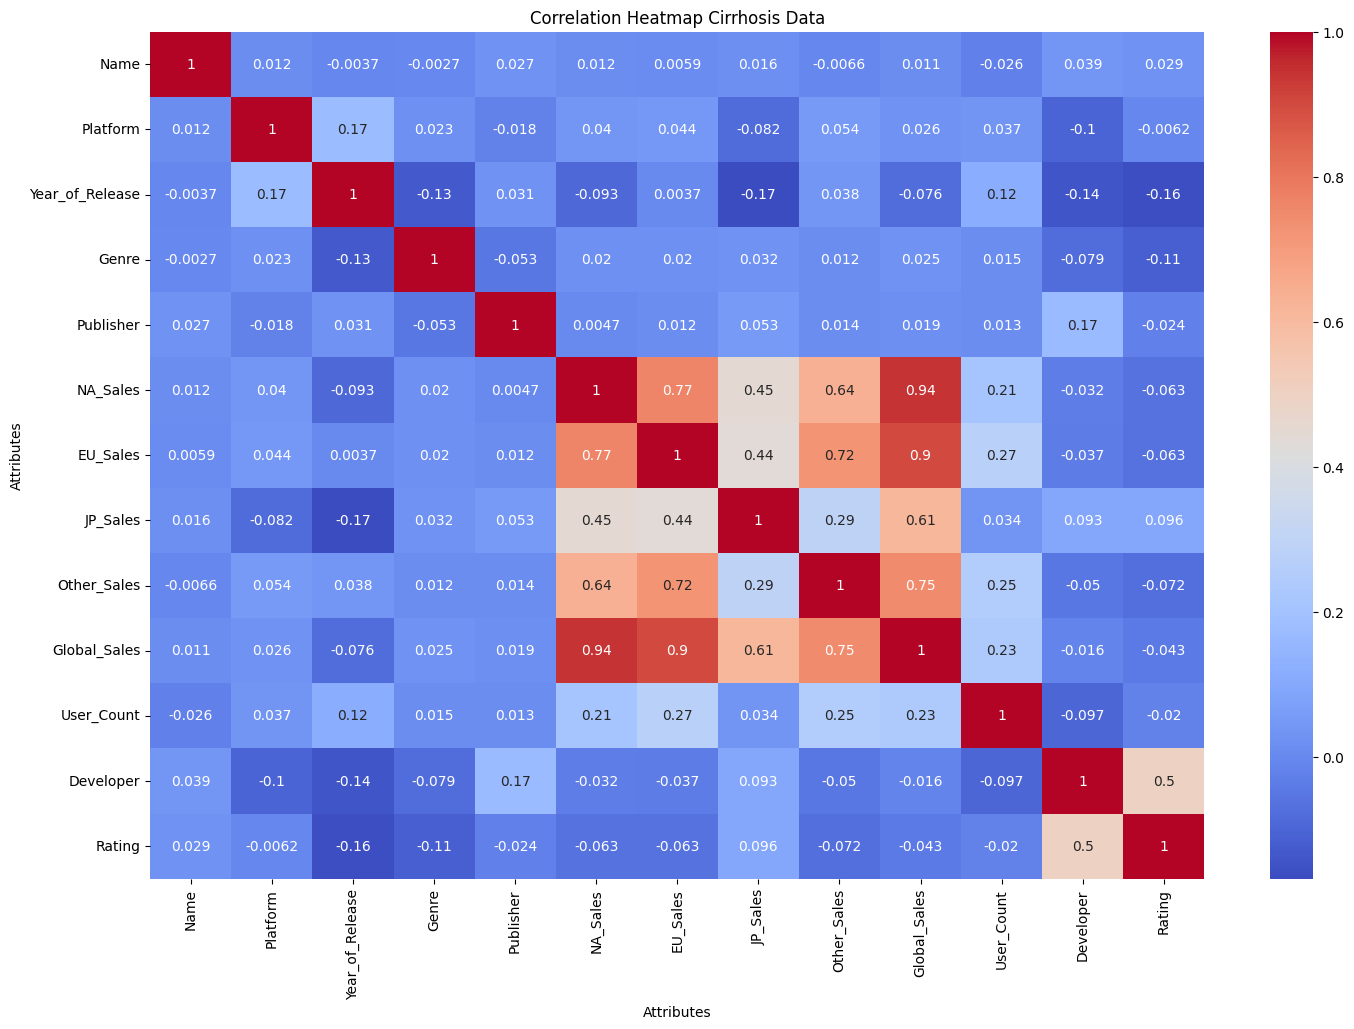

In [584]:
# Heatmap
from sklearn.preprocessing import LabelEncoder

df = data.copy()

bin_enc = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = bin_enc.fit_transform(df[col].astype(str))

correlation_matrix_all = df.corr()

plt.figure(figsize=(17, 11))
sns.heatmap(correlation_matrix_all, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap Cirrhosis Data")
plt.xlabel("Attributes")
plt.ylabel("Attributes")
plt.show()

The heatmap reveals that Global_Sales is strongly correlated with NA_Sales (0.94), EU_Sales (0.90), and moderately with Other_Sales (0.75) and JP_Sales (0.61), indicating that sales in North America and Europe contribute the most to global sales. Regional sales also show strong intercorrelations, particularly between NA_Sales and EU_Sales (0.77). Attributes like Year_of_Release, Platform, Genre, and Publisher exhibit weak or negligible correlations with sales, suggesting minimal direct influence. Notably, Rating shows a moderate correlation with Developer (0.5), implying a potential relationship between game ratings and developers, while User_Count has a weak positive correlation with sales, indicating that user engagement might slightly impact sales performance

In [585]:
# Seperate the categorical and numerical column
cat_cols = []
num_cols = []

for i in data.columns:
    if 'int' in str(data[i].dtype) or 'float' in str(data[i].dtype):
        num_cols.append(i)
    else:
        cat_cols.append(i)

print(f'Categorical: {cat_cols}')
print(f'Numeric: {num_cols}')

Categorical: ['Name', 'Platform', 'Genre', 'Publisher', 'Developer', 'Rating']
Numeric: ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'User_Count']


## Numerical Column Distribution

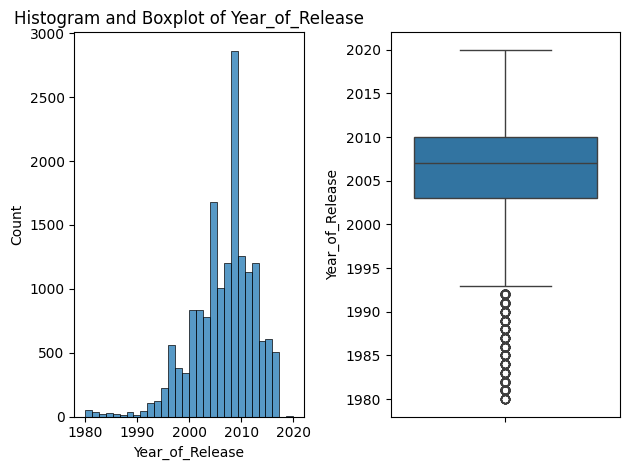

Skewness:  -0.9754000647557888
Kurtosis:  1.7689352754520904


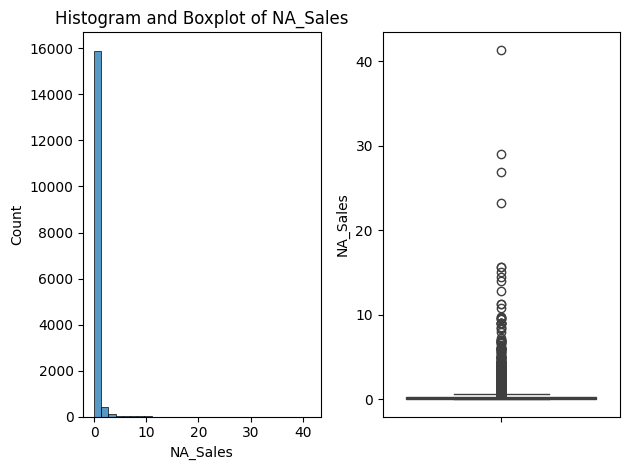

Skewness:  18.688687072907527
Kurtosis:  641.9446500968979


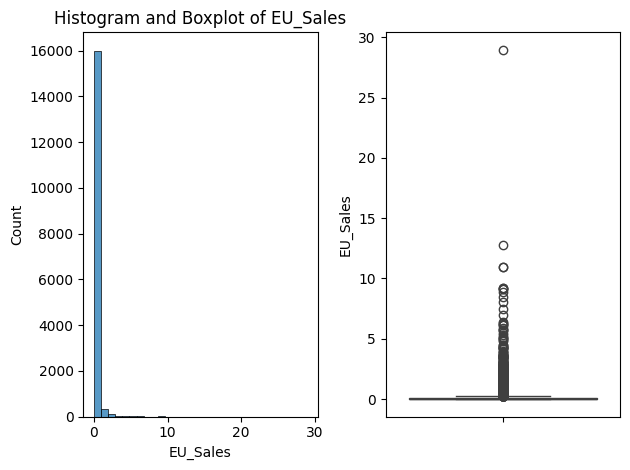

Skewness:  18.738452798697537
Kurtosis:  746.2404528724915


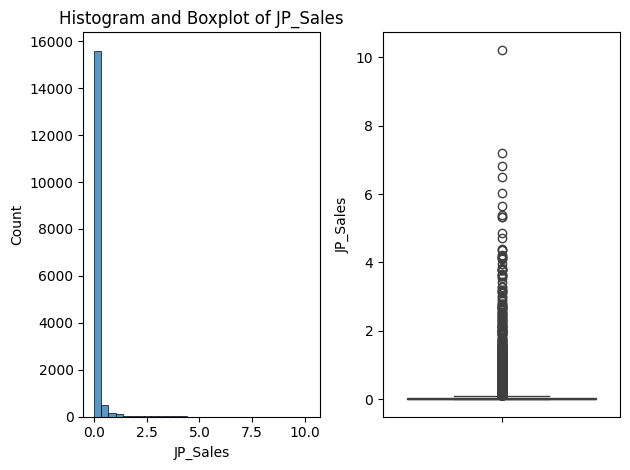

Skewness:  11.070250092790374
Kurtosis:  189.87166615170062


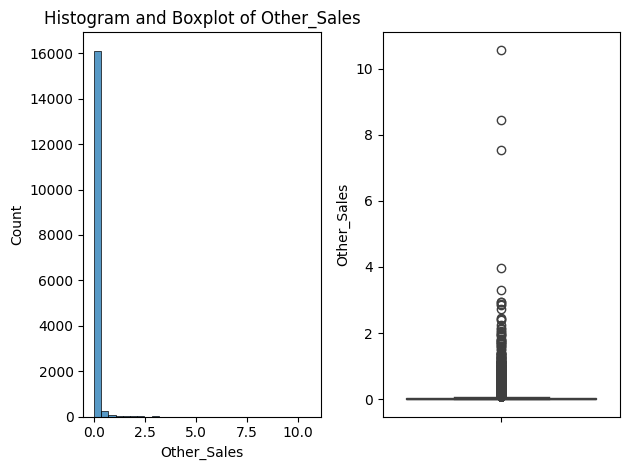

Skewness:  24.469223979053243
Kurtosis:  1043.9400116060492


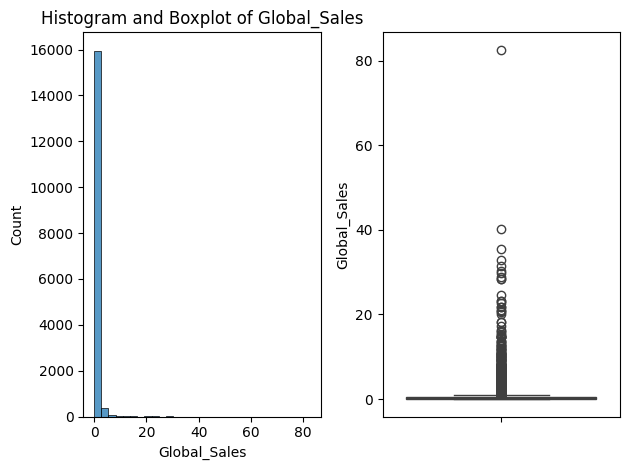

Skewness:  17.254903941484464
Kurtosis:  595.4579869766508


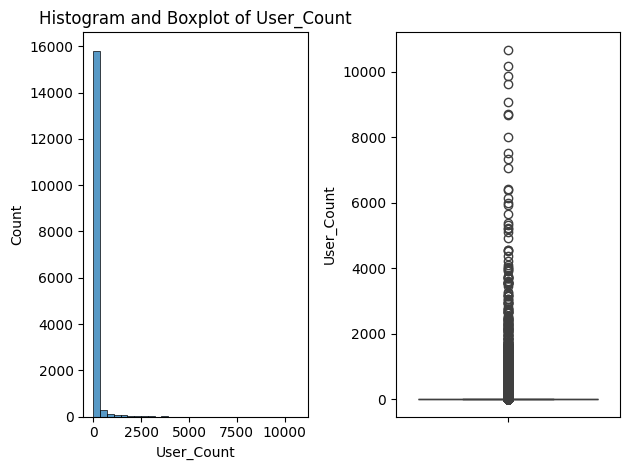

Skewness:  13.346730595878359
Kurtosis:  245.55094451197778


In [586]:
# Plotting distribution for numerical column
for i in num_cols:
    plt.subplot(1,2,1)
    sns.histplot(data[i], bins = 30)
    plt.title(f"Histogram and Boxplot of {i}")

    plt.subplot(1,2,2)
    sns.boxplot(data[i])
    plt.tight_layout()
    plt.show()
    print("Skewness: ", data[i].skew())
    print("Kurtosis: ", data[i].kurt())

The visualizations show histograms and boxplots for multiple attributes, highlighting the distribution and presence of outliers. Most sales-related attributes, including **NA_Sales**, **EU_Sales**, **JP_Sales**, **Other_Sales**, and **Global_Sales**, are highly right-skewed with the majority of data concentrated near zero, while a few extreme outliers indicate a small number of games with exceptionally high sales. Similarly, **User_Count** shows a highly skewed distribution with notable outliers. The **Year_of_Release** is more evenly distributed, peaking around 2005–2015, and its boxplot suggests a broader spread without significant outliers. These patterns indicate that the dataset is dominated by games with low sales and user counts, with a few blockbusters driving the extremes

Skewness values indicate the degree of asymmetry or skew in the data distribution. If skewness is between -0.5 and 0.5, the distribution is considered nearly symmetric. A positive skewness (>0) indicates a right skew, where the tail of the distribution is longer on the right side, while negative skewness (<0) indicates a left skew, where the tail is longer on the left side. Distributions with skewness between -1 and -0.5 or 0.5 and 1 are considered moderately skewed, while skewness below -1 or above 1 indicates a highly skewed distribution that may require data transformation for further analysis

Kurtosis values help in understanding the shape of the data distribution, especially in measuring the peak height and tail thickness. Kurtosis indicates how sharp or flat the peak of the distribution is compared to a normal distribution. If the kurtosis value is close to 3, the distribution is called mesokurtic, similar to the normal distribution, with a moderate peak and standard tail thickness. On the other hand, if the kurtosis value is less than 3, the distribution is called platykurtic, with a flatter peak and thinner tails, indicating that the data tends to be more evenly spread out

## Categorical Column Distribution

In [587]:
# Check distribution for categorical column
for col in cat_cols:
    print(data[col].value_counts())
    print("\n")

Name
Need for Speed: Most Wanted     12
LEGO Marvel Super Heroes         9
FIFA 14                          9
Ratatouille                      9
FIFA Soccer 13                   8
                                ..
What's Cooking? Jamie Oliver     1
Me & My Katamari                 1
Carnival Island                  1
Musou Orochi Z                   1
Haitaka no Psychedelica          1
Name: count, Length: 11397, dtype: int64


Platform
PS2     2134
DS      2129
PS3     1309
Wii     1292
X360    1233
PS      1203
PSP     1195
PC       953
XB       803
GBA      793
GC       546
3DS      517
PSV      432
PS4      396
N64      322
XOne     249
SNES     242
SAT      175
WiiU     147
2600     119
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64


Genre
Action          3318
Sports          2317
Misc            1712
Role-Playing    1491
Shooter         1300
Adventure       

The most common game titles include Need for Speed: Most Wanted and LEGO Marvel Super Heroes, appearing multiple times, while the majority of games are unique. The PS2 and DS platforms dominate with over 2,000 games each, followed by other platforms like PS3, Wii, and X360, showing their popularity in the gaming industry. Action is the most prevalent genre (3,318 games), followed by Sports and Misc, while Puzzle is the least common. Electronic Arts, Activision, and Namco Bandai Games are the leading publishers, with many smaller publishers contributing only one game each. A significant proportion of games lack developer information (Unknown, 6,575), with Ubisoft and EA Sports leading among known developers. Similarly, many games have an Unknown rating (6,713), but among rated games, E (Everyone) is the most common, followed by T (Teen) and M (Mature). This highlights the dominance of family-friendly and teen-rated games in the industry

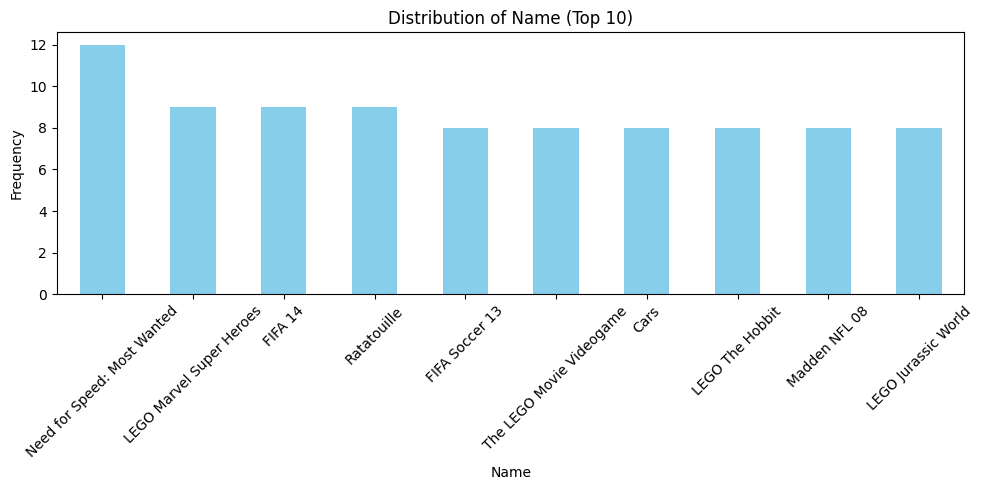

In [588]:
# Column name distribution
plt.figure(figsize=(10, 5))
data['Name'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Distribution of Name (Top 10)')
plt.xlabel('Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The "Name" distribution shows the top 10 most frequently appearing game titles in the dataset. Need for Speed: Most Wanted is the most common title with 12 occurrences, followed closely by LEGO Marvel Super Heroes and FIFA 14, each appearing 9 times. This indicates a strong presence of popular franchise games, with multiple releases or regional variations contributing to their high frequency

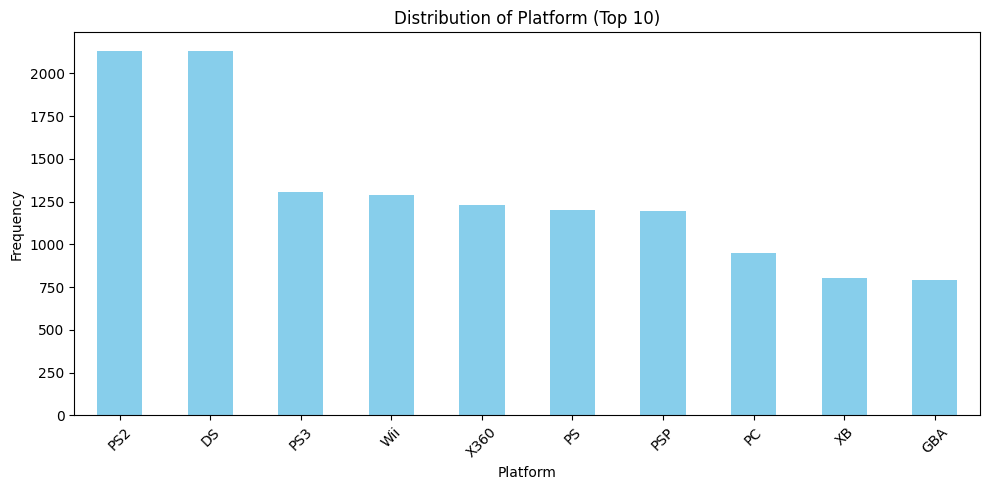

In [589]:
# Distribusi kolom platform untuk top 10 teratas
plt.figure(figsize=(10, 5))
data['Platform'].value_counts().head(10).plot(kind='bar', color='skyblue')  # Menampilkan 10 nilai teratas
plt.title('Distribution of Platform (Top 10)')
plt.xlabel('Platform')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The "Platform" distribution highlights the top 10 gaming platforms, with PS2 and DS leading at around 2,000 games each. Other popular platforms include PS3, Wii, and X360, reflecting the dominance of these consoles in the gaming industry during their respective eras. The presence of platforms like PC and GBA in the top 10 underscores the diversity of gaming preferences

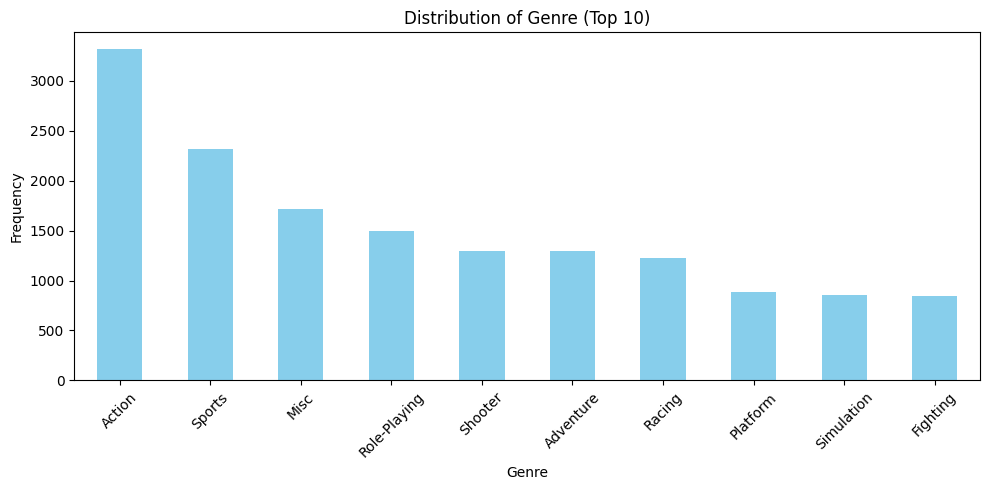

In [590]:
# Distribusi kolom genre untuk top 10 teratas
plt.figure(figsize=(10, 5))
data['Genre'].value_counts().head(10).plot(kind='bar', color='skyblue')  # Menampilkan 10 nilai teratas
plt.title('Distribution of Genre (Top 10)')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The "Genre" distribution identifies Action as the most common genre, with over 3,000 games, followed by Sports, Misc, and Role-Playing. This trend reflects the broad appeal of action-packed and sports games, while genres like Simulation and Fighting appear less frequently but still maintain a strong presence in the top 10

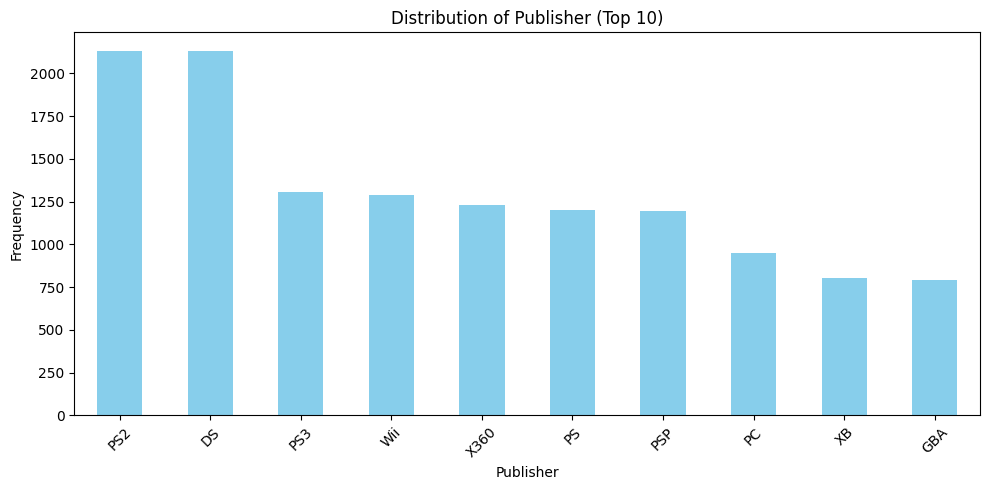

In [591]:
# Distribusi kolom publisher untuk top 10 teratas
plt.figure(figsize=(10, 5))
data['Platform'].value_counts().head(10).plot(kind='bar', color='skyblue')  # Menampilkan 10 nilai teratas
plt.title('Distribution of Publisher (Top 10)')
plt.xlabel('Publisher')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The "Publisher" distribution reveals the top 10 most prolific publishers, with Electronic Arts leading significantly, followed by Activision and Namco Bandai Games. These publishers are known for producing numerous successful games across various platforms and genres, showcasing their impact on the gaming industry

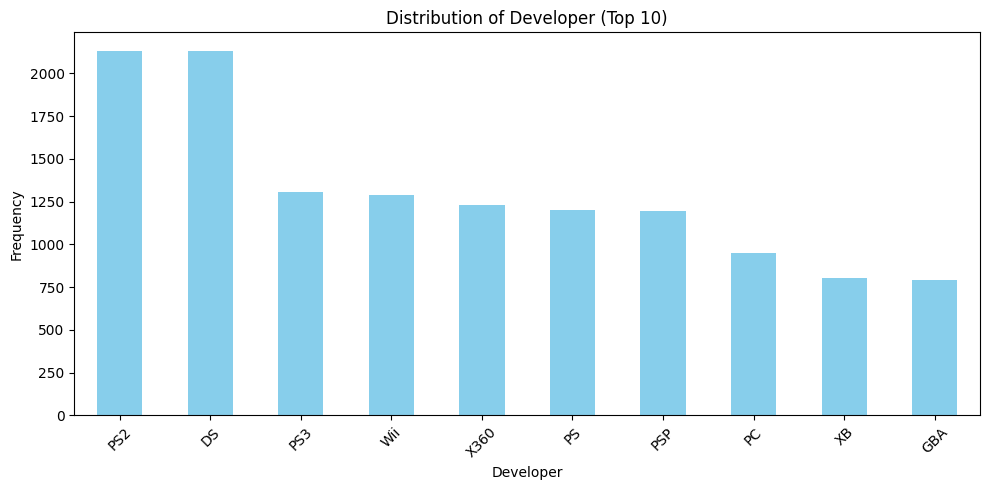

In [592]:
# Distribusi kolom developer untuk top 10 teratas
plt.figure(figsize=(10, 5))
data['Platform'].value_counts().head(10).plot(kind='bar', color='skyblue')  # Menampilkan 10 nilai teratas
plt.title('Distribution of Developer (Top 10)')
plt.xlabel('Developer')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The "Developer" distribution shows that Unknown developers dominate the dataset, indicating a lack of developer information for a significant portion of games. Among known developers, Ubisoft, EA Sports, and EA Canada are the most prominent, emphasizing their role in creating popular and frequently published games

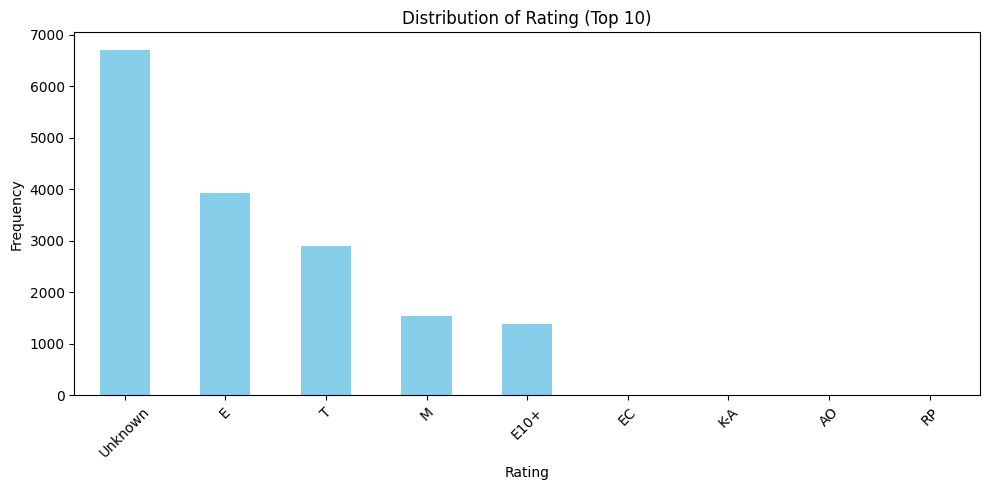

In [593]:
# Distribusi kolom rating untuk top 10 teratas
plt.figure(figsize=(10, 5))
data['Rating'].value_counts().head(10).plot(kind='bar', color='skyblue')  # Menampilkan 10 nilai teratas
plt.title('Distribution of Rating (Top 10)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The "Rating" distribution highlights that a significant portion of games have an Unknown rating, followed by those rated E, which dominates among rated games. T and M are also common, indicating a balanced mix of family-friendly and mature content in the dataset. Niche ratings like EC and AO appear rarely

# Make a soup feature

In [594]:
# Copy the dataframe
rmd = data.copy()

In [595]:
# Show the first five rows
rmd.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,24.0,Unknown,Unknown
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,24.0,Unknown,Unknown


In [596]:
# Creating a Combined Text-Based Feature for Recommendation System
def create_soup(row):
    genre = ' '.join([row['Genre']] * 3) if row['Genre'] else ''
    name = ' '.join([row['Name']] * 2) if row['Name'] else ''
    platform = row['Platform'] if row['Platform'] else ''
    publisher = row['Publisher'] if row['Publisher'] else ''
    developer = row['Developer'] if row['Developer'] else ''
    
    rating = row['Rating'] if row['Rating'] else ''

    return f"{genre} {name} {platform} {publisher} {developer} {rating}"

rmd['soup'] = rmd.apply(create_soup, axis=1)

In [597]:
# Displaying the First Combined Feature
print(rmd['soup'].iloc[0])

Sports Sports Sports Wii Sports Wii Sports Wii Nintendo Nintendo E


# Apply TF-IDF

In [598]:
# Creating TF-IDF Matrix from Combined Features
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(rmd['soup'])

In [599]:
# Numerical Column Scaling
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
numerical_features = scaler.fit_transform(rmd[['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'User_Count']])

In [600]:
# Combining TF-IDF Matrix with Numerical Features
combined_features = np.hstack([tfidf_matrix.toarray(), numerical_features])

In [601]:
# Shape TF-IDF Matrix
print(tfidf_matrix.shape)

(16495, 9870)


# Count the cosine similarity

In [602]:
# Calculating Cosine Similarity for Combined Features
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(combined_features, combined_features)

# Build the recommendation system

In [603]:
# Creating a Reverse Mapping of Game Names to Indices
indices = pd.Series(rmd.index, index=rmd['Name'])

In [605]:
# Implementing Game Recommendation System with Cosine Similarity and Detailed Output
def find_closest_match(name, indices):
    from difflib import get_close_matches

    all_names = indices.index.tolist()
    closest_matches = get_close_matches(name, all_names, n=1, cutoff=0.1)

    if closest_matches:
        return closest_matches[0]
    return None

def get_recommendations(name, cosine_sim=cosine_sim):
    full_name = find_closest_match(name, indices)
    if not full_name:
        raise ValueError(f"Game with name '{name}' not found in dataset")

    idx = indices[full_name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:6]
    game_indices = [i[0] for i in sim_scores]

    return rmd['Name'].iloc[game_indices]

def get_recommendations_with_details(name, cosine_sim=cosine_sim):
    full_name = find_closest_match(name, indices)
    if not full_name:
        raise ValueError(f"Game dengan nama '{name}' tidak ditemukan dalam dataset.")

    idx = indices[full_name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[:6]
    game_indices = [i[0] for i in sim_scores]


    return rmd[['Name', 'Genre', 'Platform', 'Publisher', 'Rating']].iloc[game_indices]


The `get_recommendations` function works by finding games similar to the given input using a combination of text-based and numerical features. First, the `find_closest_match` function ensures that the input game name closely matches one in the dataset, preventing mismatches due to slight variations in spelling. Then, using the precomputed `cosine_sim` matrix (which measures similarity between games based on both textual and numerical features), the function retrieves similarity scores for all games relative to the input game. It sorts these scores in descending order and returns the top five most similar games. The reason why the function recommends games like *EA Sports Active*, *Wii Play*, and *LEGO Harry Potter: Years 1-4* when given *Wii Sports* as input is likely due to their shared platform (Nintendo Wii), similar genre classifications (sports, casual, or family-friendly games), and comparable sales figures or user engagement metrics. This approach ensures that recommendations are not only based on genre but also on market trends and player behavior, making them more relevant to the user’s interests

# Evaluate the recommender system

### Input Pertama

In [606]:
# Generating and Displaying Game Recommendations
recommendations = get_recommendations('Wii Sports')
print(recommendations)

310                     EA Sports Active
294                       Carnival Games
7                               Wii Play
437    Club Penguin: Elite Penguin Force
638         LEGO Harry Potter: Years 1-4
Name: Name, dtype: object


The recommendations for *Wii Sports* including *EA Sports Active*, *Carnival Games*, *Wii Play*, *Club Penguin: Elite Penguin Force*, and *LEGO Harry Potter: Years 1-4* are based on a combination of genre, platform, publisher, and numerical similarities. Since *Wii Sports* is a casual sports game, the system suggests *EA Sports Active*, another sports-focused fitness game, and *Wii Play*, which shares a casual, family-friendly experience. *Carnival Games* fits the casual party game genre, making it relevant, while *Club Penguin: Elite Penguin Force* and *LEGO Harry Potter* likely appear due to overlapping platform (Wii or similar consoles) and publisher connections. Additionally, the numerical sales and user count features further refine the recommendations, ensuring they align with *Wii Sports* in terms of popularity and market appeal

In [607]:
# Generating and Displaying Game Recommendations
recommendations = get_recommendations_with_details("Wii Sports")
print(recommendations)

                                  Name      Genre Platform  \
0                           Wii Sports     Sports      Wii   
310                   EA Sports Active     Sports      Wii   
294                     Carnival Games       Misc      Wii   
7                             Wii Play       Misc      Wii   
437  Club Penguin: Elite Penguin Force  Adventure       DS   
638       LEGO Harry Potter: Years 1-4     Action      Wii   

                                  Publisher Rating  
0                                  Nintendo      E  
310                         Electronic Arts      E  
294                    Take-Two Interactive      E  
7                                  Nintendo      E  
437              Disney Interactive Studios      E  
638  Warner Bros. Interactive Entertainment   E10+  


### Input Kedua

In [608]:
# Generating and Displaying Game Recommendations
recommendations = get_recommendations('Mario Kart')
print(recommendations)

677     The Legend of Zelda: Majora's Mask 3D
97                       Super Mario Galaxy 2
1156                              Silent Hill
2498                       Tales of the Abyss
2188                           Star Fox 64 3D
Name: Name, dtype: object


The recommendations for *Mario Kart* including *The Legend of Zelda: Majora's Mask 3D*, *Super Mario Galaxy 2*, *Silent Hill*, *Tales of the Abyss*, and *Star Fox 64 3D* suggest that the system is prioritizing platform and publisher similarities rather than strictly sticking to the racing genre. *Super Mario Galaxy 2* is the most relevant recommendation as it shares the same franchise (*Mario*), publisher (*Nintendo*), and platform (*Wii*). *The Legend of Zelda: Majora's Mask 3D* and *Star Fox 64 3D* are Nintendo published games available on similar consoles, which might explain their presence. However, *Silent Hill* and *Tales of the Abyss* seem out of place, likely due to shared numerical features such as sales or user count rather than strong thematic or genre alignment. This suggests that while the recommendation system effectively captures platform and publisher connections, it may need additional tuning to better prioritize gameplay-related similarities

In [609]:
# Generating and Displaying Game Recommendations
recommendations = get_recommendations_with_details('Mario Kart')
print(recommendations)

                                       Name         Genre Platform  \
110                            Mario Kart 8        Racing     WiiU   
677   The Legend of Zelda: Majora's Mask 3D        Action      3DS   
97                     Super Mario Galaxy 2      Platform      Wii   
1156                            Silent Hill        Action       PS   
2498                     Tales of the Abyss  Role-Playing      3DS   
2188                         Star Fox 64 3D       Shooter      3DS   

                         Publisher Rating  
110                       Nintendo      E  
677                       Nintendo   E10+  
97                        Nintendo      E  
1156  Konami Digital Entertainment      M  
2498            Namco Bandai Games      T  
2188                      Nintendo   E10+  


### Input Ketiga

In [610]:
# Generating and Displaying Game Recommendations
recommendations = get_recommendations('Pokemon')
print(recommendations)

652          Need for Speed: ProStreet
617     PES 2009: Pro Evolution Soccer
436                     FIFA Soccer 08
676          WWE SmackDown vs Raw 2008
1249                 The Simpsons Game
Name: Name, dtype: object


The recommendations for *Pokémon* including *Need for Speed: ProStreet*, *PES 2009: Pro Evolution Soccer*, *FIFA Soccer 08*, *WWE SmackDown vs. Raw 2008*, and *The Simpsons Game* indicate that the recommendation system is not correctly prioritizing genre or thematic relevance. While *Pokémon* is primarily an RPG with turn-based battles and creature collection mechanics, the suggested games belong to the racing, sports, and action-adventure genres. This mismatch likely stems from numerical feature similarities, such as high sales figures and large user counts, which *Pokémon* games share with popular sports franchises like *FIFA* and *PES*. Additionally, if the dataset lacks a clear "Pokémon" game entry or if *find_closest_match* misidentified the input, the system may have matched *Pokémon* with other high-selling, multi-platform games rather than focusing on RPG mechanics or franchise-specific elements. This suggests that the model could benefit from weighting genre and franchise-specific keywords more heavily in the TF-IDF matrix

In [611]:
# Generating and Displaying Game Recommendations
recommendations = get_recommendations_with_details('Pokemon')
print(recommendations)

                                Name     Genre Platform  \
349        Pro Evolution Soccer 2008    Sports      PS2   
652        Need for Speed: ProStreet    Racing      PS2   
617   PES 2009: Pro Evolution Soccer    Sports      PS2   
436                   FIFA Soccer 08    Sports      PS2   
676        WWE SmackDown vs Raw 2008  Fighting      PS2   
1249               The Simpsons Game    Action      PS2   

                         Publisher   Rating  
349   Konami Digital Entertainment        E  
652                Electronic Arts     E10+  
617   Konami Digital Entertainment  Unknown  
436                Electronic Arts        E  
676                            THQ        T  
1249               Electronic Arts        T  
